# Exploring Stackoverflow Anual Survey 2019
This is the first project for Udacity's Data Scientist Nanodegree. 
The data used in this project was obtained from Stack Overflow Annual Developer Survey 
The whole project is implemented following "Cross-Industry Standard Process for Data Mining (CRISP-DM)" process, 
an industry standard for data analysis. It includes 6 steps:

1. Business Understanding.
2. Data Understanding.
3. Prepare Data.
4. Data Modeling.
5. Evaluate the Results
6. Deploy.
In this project, we will follow the above steps to explore the data.

### 1.Business Understanding
I'm very interested in the preferences and subjective experiences of people in the workforce. After some thought, I landed on these three questions to explore in my investigation:

1. What does data just about man and women in terms of salary and working hours?
2. How does company size influence the job satisfaction of developers?
3. Do people in different countries learn about software development in different ways?

### 2. Data Understanding
First of all, let's import some useful libriaries and load the data.

In [49]:
# import library we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

# load the data and take a look
df_public = pd.read_csv('Downloads./survey_results_public.csv')
df_schema = pd.read_csv('Downloads./survey_results_schema.csv')
df_public.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [41]:
# Total rows and columns
df_public.shape

(88883, 85)

In [42]:
df_schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...


### 3. & 4. Prepare Data and Data Modeling
Now, let's get to prepare our data and answer the questions.

In [43]:
df_public.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [46]:
df_public.isnull().sum()

Respondent            0
MainBranch          552
Hobbyist              0
OpenSourcer           0
OpenSource         2041
Employment         1702
Country             132
Student            1869
EdLevel            2493
UndergradMajor    13269
EduOther           4623
OrgSize           17092
DevType            7548
YearsCode           945
Age1stCode         1249
YearsCodePro      14552
CareerSat         16036
JobSat            17895
MgrIdiot          27724
MgrMoney          27726
MgrWant           27651
JobSeek            8328
LastHireDate       9029
LastInt           21728
FizzBuzz          17539
JobFactors         9512
ResumeUpdate      11006
CurrencySymbol    17491
CurrencyDesc      17491
CompTotal         32938
                  ...  
Containers         3517
BlockchainOrg     40708
BlockchainIs      28718
BetterLife         2614
ITperson           1742
OffOn              2220
SocialMedia        4446
Extraversion       1578
ScreenName         8397
SOVisit1st         5006
SOVisitFreq     

### 1. What does data just about man and women in terms of salary and working hours?

In [51]:
# Choose data related to women
women_df = df_public[df_public['Gender']=='Woman']
# Drop columns with all nan values
women_df = women_df.dropna(how='all', axis=1)

# Choose data related to men for future use
men_df = df_public[df_public['Gender']=='Man']
# Drop columns with all nan values
men_df = men_df.dropna(how='all', axis=1)

women_df.shape

(6344, 85)

First, let's pull out all the numerical variables from women_df and see the overall statistics

In [52]:
women_df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,6344.000000,3.768000e+03,3.762000e+03,4390.000000,3149.000000,5636.000000
mean,44507.677333,2.307483e+11,1.148642e+05,41.813683,4.770276,29.495724
std,25776.051327,1.416424e+13,2.571464e+05,75.488601,5.239644,8.350789
min,12.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22031.000000,2.200000e+04,2.668725e+04,39.000000,2.000000,24.000000
50%,44851.500000,6.100000e+04,5.753200e+04,40.000000,4.000000,28.000000
75%,66698.500000,1.054878e+05,9.899100e+04,40.000000,5.000000,33.000000
max,88864.000000,8.694580e+14,2.000000e+06,4850.000000,90.000000,99.000000


In [53]:
men_df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,77919.000000,5.061100e+04,5.050300e+04,58057.000000,44976.000000,71566.000000
mean,44437.350659,1.975873e+11,1.274582e+05,42.143995,5.063939,30.424480
std,25644.559035,4.445059e+13,2.848084e+05,33.022336,5.345024,9.162677
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22236.500000,2.000000e+04,2.566800e+04,40.000000,2.000000,24.000000
50%,44430.000000,6.200000e+04,5.725400e+04,40.000000,4.000000,29.000000
75%,66645.000000,1.200000e+05,1.000000e+05,45.000000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4125.000000,99.000000,99.000000


The average annual salary that female earn is \$114,864.2\ which is slightly less than female of \$127,458.2. The average working hours per week for female is \$41.8, and \$42.1 for male. If we calclulate the salary per hour, we can get \$55 per hour for female and \$60.6 per hour for male.

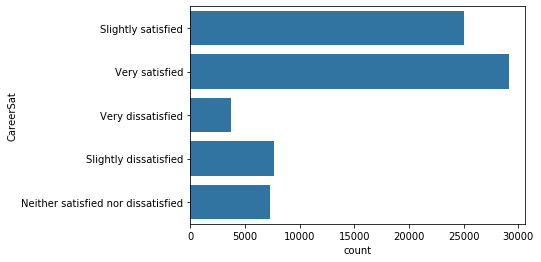

In [183]:
sns.countplot(data = df_public, y = 'CareerSat', color=sns.color_palette()[0]);


In [185]:
#Drop the row if it has NaN in JobSat or Country column
df_cj = df_public.dropna(axis=0, subset=['Country', "JobSat"],how='any')

In [186]:
df_cj.shape

(70988, 85)

In [187]:
df_cj['JobSat'].unique()


array(['Slightly satisfied', 'Slightly dissatisfied',
       'Neither satisfied nor dissatisfied', 'Very satisfied',
       'Very dissatisfied'], dtype=object)

### 2. How does company size influence the job satisfaction of developers?
Many respondents claim that 'Office environment or company culture' is an important job factor, and that big challenges at work are 'Distracting work environment', 'Meetings' and 'Not enough people for the workload'. It's not hard to imagine that the size of a company would have an impact on how happy developers are at work.

To find out whether there's a relationship between job satisfaction and company size, I'll use a clustered bar chart, with the clusters on the x-axis denoting organization size and the individual bars in each cluster representing the level of lob satisfaction.


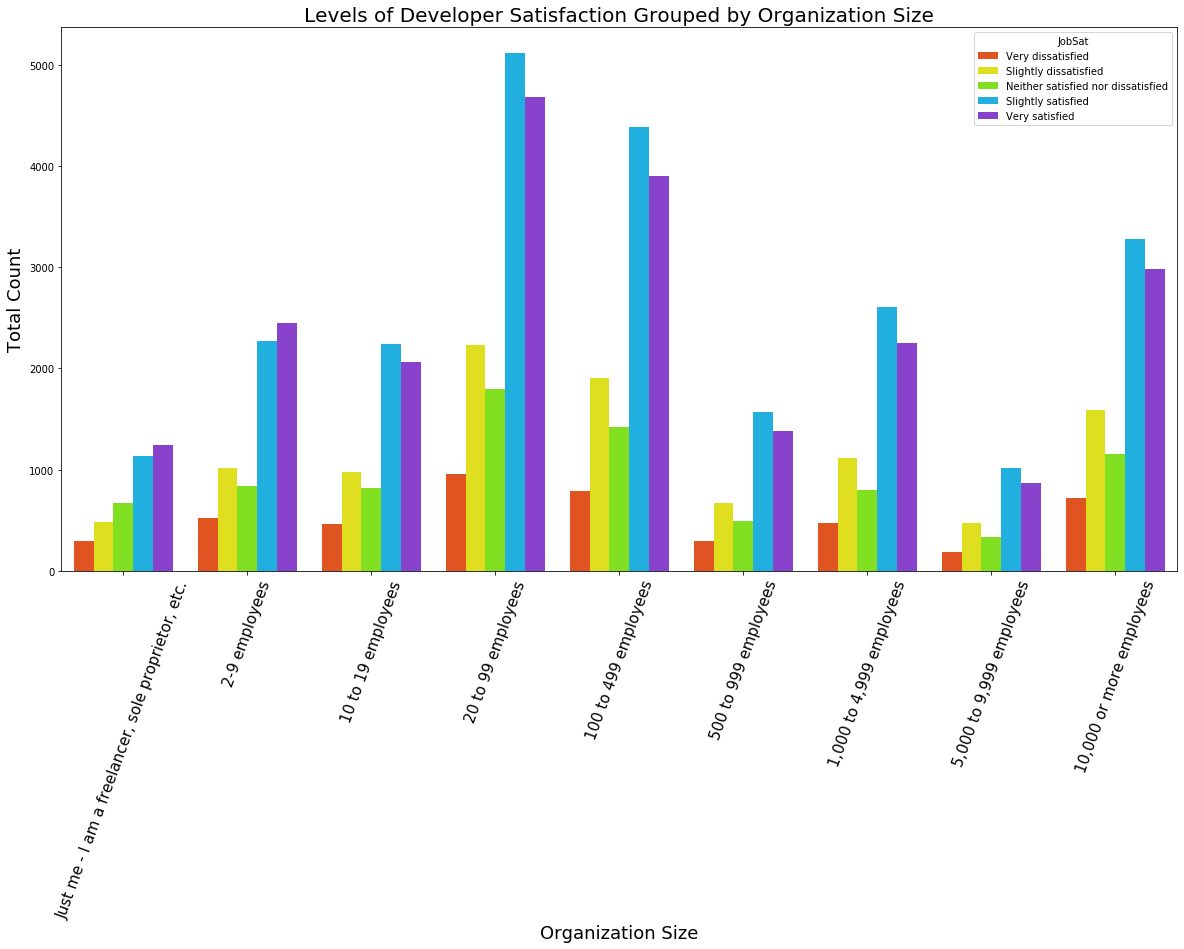

In [172]:
# Make a new dataframe that drops all rows with null values in the OrgSize and JobSat columns
df_oj= df_public.dropna(subset=['OrgSize', 'JobSat'], axis=0)

# Make a clustered bar chart of job satisfaction grouped by organization size
palette={'Very dissatisfied':'orangered', 'Slightly dissatisfied':'yellow',
         'Neither satisfied nor dissatisfied':'chartreuse', 'Slightly satisfied':'deepskyblue',
         'Very satisfied':'blueviolet'}
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(ax=ax, x='OrgSize', hue='JobSat', data=df_oj,
              order=["Just me - I am a freelancer, sole proprietor, etc.", 
                     "2-9 employees", "10 to 19 employees", "20 to 99 employees", 
                     "100 to 499 employees", "500 to 999 employees", 
                     "1,000 to 4,999 employees", "5,000 to 9,999 employees", 
                     "10,000 or more employees"],
              hue_order=['Very dissatisfied', 'Slightly dissatisfied',
                        'Neither satisfied nor dissatisfied',
                        'Slightly satisfied', 'Very satisfied'],
              palette=palette)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15, rotation=70)
ax.set_title('Levels of Developer Satisfaction Grouped by Organization Size', fontsize=20)
ax.set_xlabel('Organization Size', fontsize=18)
ax.set_ylabel('Total Count', fontsize=18);

Of the range of 9 different organization sizes represented in the survey data, it looks freelancers/sole proprietors and people in companies of 2-9 employees report the highest proportionate job satisfaction - in both these categories, more people report being 'Very satisfied' with their jobs than only 'Slightly satisfied'. Among sole proprietors, more people also report feeling neutral about their jobs than unsatisfied, which distinguishes that category from all other possible categories of organization size.

However, in the two largest categories - respondents in organizations ranging from 20-99 employees, and from 100-499 employees - a larger overall proportion of people report being 'Very satisified' or 'Slightly satisfied' than neutral or dissatisfied.

### 3: Do people in different countries learn about software development in different ways?
Cultural differences can have a significant impact on self-directed learning. It seems likely that people who live and work in different countries would use different channels to learn software development skills.

For this analysis, I'll select the ten countries that the largest number of respondents report being from. Then I'll use correlation matrix to make a heat map of those countries and the value counts of the various types of non-degree software development education that their residents have taken advantage of.

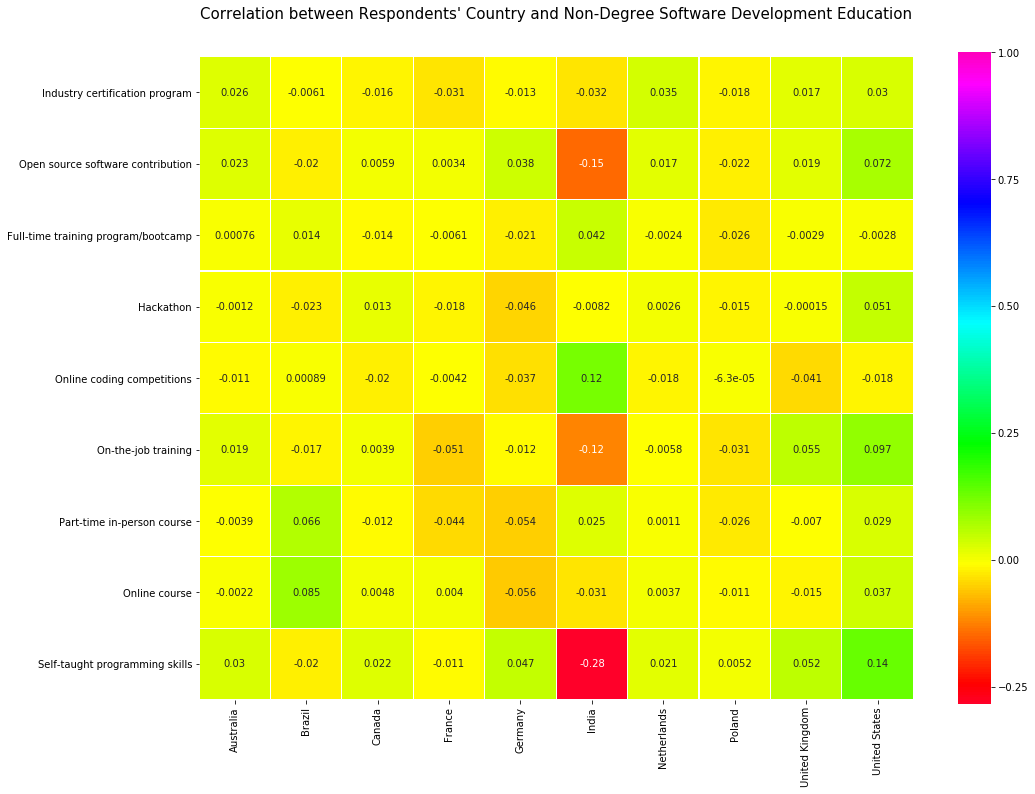

In [182]:
# using only the top 10 countries among respondents
df3_columns = ['Country', 'EduOther'] 
df3 = pd.DataFrame(df_public.query("Country == 'United States' or Country == 'India' or Country == 'Germany' or Country == 'United Kingdom' or Country == 'Canada' or Country == 'France' or Country == 'Brazil' or Country == 'Poland' or Country == 'Australia' or Country == 'Netherlands'"))[df3_columns]

# Split the Country and EduOther values into columns of dummy variables
df3 = pd.concat([df3.drop('Country', axis=1), df3['Country'].str.get_dummies()], axis=1)
df3 = pd.concat([df3.drop('EduOther', axis=1), df3['EduOther'].str.get_dummies(sep=';')], axis=1)

# Make a correlation matrix, and then use the correlation matrix as a new dataframe
df3 = df3.corr()

# Drop the Country rows from one axis, and the EduOther columns from the other
df3.drop(['Australia', 'Brazil', 'Canada', 'France', 'Germany', 'India',
          'Netherlands', 'Poland', 'United Kingdom', 'United States'], axis=0, inplace=True)
df3.drop(['Completed an industry certification program (e.g. MCPD)',
          'Contributed to open source software',
          'Participated in a full-time developer training program or bootcamp',
          'Participated in a hackathon',
          'Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)',
          'Received on-the-job training in software development',
          'Taken a part-time in-person course in programming or software development',
          'Taken an online course in programming or software development (e.g. a MOOC)',
          'Taught yourself a new language, framework, or tool without taking a formal course'], 
         axis=1, inplace=True)
# Rename the EduOther rows to conserve space on the graph
df3.rename(index={'Completed an industry certification program (e.g. MCPD)': 'Industry certification program',
                  'Contributed to open source software': 'Open source software contribution',
                  'Participated in a full-time developer training program or bootcamp': 'Full-time training program/bootcamp',
                  'Participated in a hackathon': 'Hackathon',
                  'Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)': 'Online coding competitions',
                  'Received on-the-job training in software development': 'On-the-job training',
                  'Taken a part-time in-person course in programming or software development': 'Part-time in-person course',
                  'Taken an online course in programming or software development (e.g. a MOOC)': 'Online course',
                  'Taught yourself a new language, framework, or tool without taking a formal course': 'Self-taught programming skills'},
           inplace=True)

# Plot the results on a heatmap
colormap = plt.cm.gist_rainbow
plt.figure(figsize=(16, 12))
plt.title("Correlation between Respondents' Country and Non-Degree Software Development Education", y=1.05, size=15)
sns.heatmap(df3, linewidths=0.1, vmax=1, square=True, cmap=colormap, linecolor='white', annot=True);

There are some interesting trends indicated here. To start, the correlations clearly show that survey respondents from India are least likely to teach themselves programming skills, to contribute to open-source software, or to receive on-the-job training - but they have a strong inclination to participate in online coding competitions, and are relatively likely to participate in full-time training programs. By contrast, respondents from the United States are very likely to have self-taught programming skills, on-the-job training or open-source software contributions, and are relatively likely to participate in hackathons.

The ones most likely to learn software development from online programming courses or MOOCs are respondents from from Brazil, and they are also the most likely to take part-time in-person courses. United Kingdom respondents have a positive correlation with on-the-job training and self-taught skills, and a negative one with online coding competitions. Respondents from France are relatively unlikely to learn programming from on-the-job training or part-time in-person courses. And respondents from Germany are unlikely to learn from online courses, part-time in-person courses, hackathons or coding competitions, and are likely to to be self-taught or contribute to open source-software instead.

### 5. 6. Results & Deploy
Please check my blog post on [Medium]() to see an summary of the result.
